# **AP155 Lab Assignment** 
## Module 3: Solution of Linear and Nonlinear Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 to 5 are worth 15, 15, 15, 25, and 30 points, respectively).

_Due Date_: **5PM of November 9 (Tue)**


### Student Information 

_Full Name (Last Name, First Name)_: Baldres, Jonabel Eleanor B.  \
_Student No._: 2020-07278 \
_Section_: THU-HX-3

### Submission Information

_Date and Time Submitted (most recent upload)_: 

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Jonabel Eleanor B. Baldres** 

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/15
* Problem 2 - XX/15
* Problem 3 - XX/15
* Problem 4 - XX/25
* Problem 5 - XX/30

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

### PROBLEM 1 (15 pts.; 50/50 for code & discussion) 
**Calculate the inverse of a matrix and LU decomposition**

1. Use numpy's $\tt linalg$ package to calculate the inverse of the ff. matrix *(5 pts.)*: 

$ \begin{equation} 
{\bf A} = 
\begin{pmatrix} 
4 & -2 & 1 \\
3 & 6 & -4 \\
2 & 1 & 8 
\end{pmatrix} \end{equation} $

2. Check your inverse in both directions; that is, check that ${\bf AA}^{−1} = {\bf A}^{−1}{\bf A} = {\bf I}$. Up to how many number of decimal places is this true? *(5 pts.)*

3. Let this matrix $\bf A$ be used to describe three simultaneous linear equations, ${\bf Ax = b}$. Solve for the vector $\bf x$ given
${\bf b} = \begin{pmatrix} 
12 \\ 
-25 \\ 
32 
\end{pmatrix}$ using: (i) the numerical inverse calculated in (1) and (ii) LU decomposition and backsubstitution with numpy's $\tt linalg$ package. *(5 pts. each)*


In [1]:
import numpy as np 
from numpy.linalg import solve

A = np.array([[4,-2,1], [3,6,-4], [2,1,8]])
A_inv = np.linalg.inv(A)
A_inv

array([[ 0.19771863,  0.06463878,  0.00760456],
       [-0.121673  ,  0.11406844,  0.07224335],
       [-0.03422053, -0.03041825,  0.11406844]])

In [2]:
np.matmul(A,A_inv)

array([[ 1.00000000e+00,  6.93889390e-18,  0.00000000e+00],
       [-2.77555756e-17,  1.00000000e+00,  5.55111512e-17],
       [ 0.00000000e+00, -5.55111512e-17,  1.00000000e+00]])

In [3]:
np.matmul(A_inv,A)

array([[ 1.00000000e+00, -3.46944695e-18,  5.55111512e-17],
       [ 2.77555756e-17,  1.00000000e+00,  2.22044605e-16],
       [ 2.77555756e-17,  0.00000000e+00,  1.00000000e+00]])

In [4]:
np.matmul(A,A_inv) == np.matmul(A_inv,A)

array([[ True, False, False],
       [False,  True, False],
       [False, False,  True]])

In [5]:
b= np.array([12,-25,32], float)

In [6]:
np.matmul(A_inv, b)

array([ 1., -2.,  4.])

In [7]:
x = solve(A,b)
x

array([ 1., -2.,  4.])

### PROBLEM 2 (15 pts.; 50/50 for code & discussion)

**Solve for eigenvalues and eigenvectors of a symmetric matrix**

1. Use numpy's $\tt linalg$ package to find the eigenvalues and eigenvectors of the ff. symmetrix matrix *(10 pts.)*: 

$ \begin{equation} 
{\bf A} = 
\begin{pmatrix} 
8 & -2 & -20 \\
-2 & -3 & -9 \\
-20 & -9 & -3 
\end{pmatrix} \end{equation} $

2. Check your answer numerically; that is, check that $\bf AV = VD$, where the $N$ x $N$ matrix $\bf V$ has the eigenvectors as its columns and $\bf D$ is the diagonal matrix with the eigenvalues $\lambda_i$ as its diagonal entries. *(5 pts.)*

In [8]:
A = np.array([[8,-2,-20], [-2,-3,-9], [-20,-9,-3]])

In [9]:
eigenvalues, eigenvectors = np.linalg.eig(A)
print(eigenvalues)
print(eigenvectors)

[-21.99606195  23.83584674   0.16021522]
[[ 0.52496527  0.76748685  0.36793396]
 [ 0.40892672  0.15169114 -0.89987151]
 [ 0.74645187 -0.62285932  0.2342133 ]]


In [10]:
AV= np.matmul(A,eigenvectors)
AV

array([[-11.54716868,  18.29369893,   0.05894862],
       [ -8.99477756,   3.61568676,  -0.14417311],
       [-16.4190016 , -14.8463793 ,   0.03752454]])

In [11]:
np.round(AV, 5)

array([[-11.54717,  18.2937 ,   0.05895],
       [ -8.99478,   3.61569,  -0.14417],
       [-16.419  , -14.84638,   0.03752]])

In [12]:
D= np.array([[eigenvalues[0], 0 ,0], [0, eigenvalues[1], 0], [0,0,eigenvalues[2]]])
VD = np.matmul(eigenvectors,D)
VD

array([[-11.54716868,  18.29369893,   0.05894862],
       [ -8.99477756,   3.61568676,  -0.14417311],
       [-16.4190016 , -14.8463793 ,   0.03752454]])

In [13]:
np.round(AV, 5) == np.round(VD, 5)

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

### PROBLEM 3 (15 pts.; 50/50 for code & discussion)

**Physics Application: Rigid body rotations with matrices**

Consider the cube in this figure:

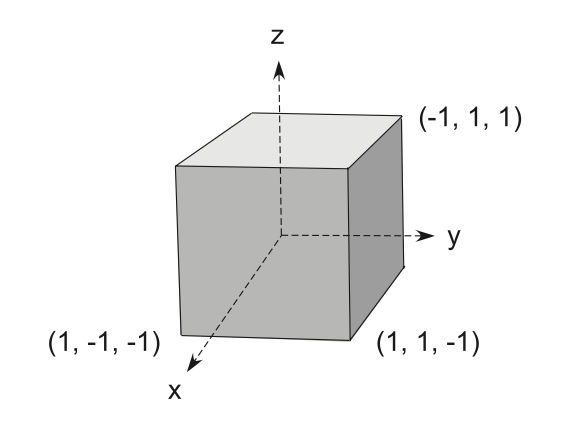

The cube has an inertia tensor for axes at the center:

$ \begin{equation} 
{\bf I} = 
\begin{pmatrix} 
2/3 & -1/4 & -1/4 \\
-1/4 & 2/3 & -1/4 \\
-1/4 & -1/4 & 2/3 
\end{pmatrix}. \end{equation} $

The cube is rotated with the three angular velocities:

$ \begin{equation} 
{\bf \omega} = 
\begin{pmatrix}
1 \\ 0 \\ 0
\end{pmatrix}, \ {\bf \omega} = 
\begin{pmatrix}
0 \\ 1 \\ 0
\end{pmatrix} \ {\bf \omega} = 
\begin{pmatrix}
1 \\ 1 \\ 1
\end{pmatrix}
\end{equation} $

1. Compute the angular momentum vector $\bf L$ via the matrix multiplication ${\bf L} = {\bf I\omega}$ for each case. (5 pts.)

2. Make three 3-D plots for ${\bf \omega}$ and ${\bf L}$ for each case. Label and describe your plots clearly. (10 pts.)

In [14]:
I = np.array([[2/3,-1/4,-1/4], [-1/4,2/3,-1/4], [-1/4,-1/4,2/3]])
omega_1 = np.array([1,0,0])
omega_2 = np.array([0,1,0])
omega_3 = np.array([1,1,1])

In [15]:
L_1 = np.matmul(I, omega_1)
L_2 = np.matmul(I, omega_2)
L_3 = np.matmul(I, omega_3)

In [16]:
L_1

array([ 0.66666667, -0.25      , -0.25      ])

In [17]:
L_2

array([-0.25      ,  0.66666667, -0.25      ])

In [18]:
L_3

array([0.16666667, 0.16666667, 0.16666667])

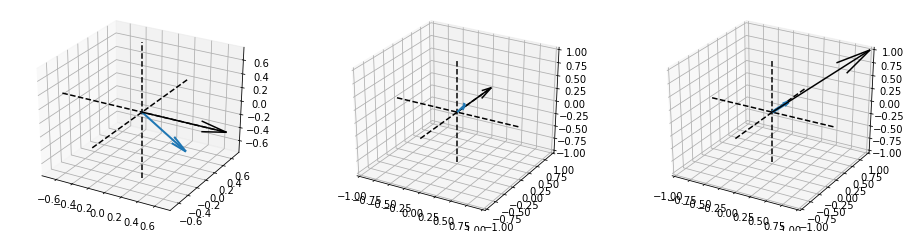

In [19]:
import matplotlib.pyplot as plt
from matplotlib import cm


from mpl_toolkits.mplot3d.axes3d import get_test_data

x = np.linspace(-1,1)
y = np.linspace(-1,1)
z = np.linspace(-1,1)

fig = plt.figure(figsize=plt.figaspect(0.25))

ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.set_xlim([-0.75,0.75])
ax.set_ylim([-0.75,0.75])
ax.set_zlim([-0.75,0.75])

start = [0,0,0]
ax.quiver(start[0],start[1],start[2], L_1[0], L_1[1], L_1[2], linewidth= 2)
ax.quiver(0,0,0, omega_1[0], omega_1[1], omega_1[2], color = 'black')
ax.plot(x,x*0,x*0, linestyle = '--', color = 'black')
ax.plot(y*0,y,y*0, linestyle = '--', color = 'black')
ax.plot(z*0,z*0,z, linestyle = '--', color = 'black')

ax2 = fig.add_subplot(1, 3, 2, projection='3d')

ax2.set_xlim([-1,1])
ax2.set_ylim([-1,1])
ax2.set_zlim([-1,1])


ax2.plot(x,x*0,x*0, linestyle = '--', color = 'black')
ax2.plot(y*0,y,y*0, linestyle = '--', color = 'black')
ax2.plot(z*0,z*0,z, linestyle = '--', color = 'black')
ax2.quiver(0,0,0, omega_2[0], omega_2[1], omega_2[2], color = 'black')
ax2.quiver(start[0],start[1],start[2], L_2[0], L_2[1], L_2[2],linewidth= 2)

ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.set_xlim([-1,1])
ax3.set_ylim([-1,1])
ax3.set_zlim([-1,1])
ax3.plot(x,x*0,x*0, linestyle = '--', color = 'black')
ax3.plot(y*0,y,y*0, linestyle = '--', color = 'black')
ax3.plot(z*0,z*0,z, linestyle = '--', color = 'black')


ax3.quiver(0,0,0, omega_3[0], omega_3[1], omega_3[2], color = 'black')
ax3.quiver(start[0],start[1],start[2], L_3[0], L_3[1], L_3[2], linewidth =3)

plt.show()

### PROBLEM 4 (25 pts.; 50/50 for code & discussion)

**Solve a nonlinear equation using the relaxation method**

Consider the equation $x=1- e^{-cx}$, where $c$ is a known parameter and $x$ is unknown. This equation arises in a variety of situations, including the physics of contact processes, mathematical models of epidemics, and the theory of random graphs.

1. Write a program to solve this equation for $x$ using the relaxation method for the case $c = 2$. Calculate your solution to an accuracy of at least $10^{-6}$. *(10 pts.)*

2. Modify your program to calculate the solution for values of $c$ from 0 to 3 in steps of 0.01. *(10 pts.)* 

3. Make a plot of $x$ as a function of $c$. Describe the different regimes that you see. *(5 pts.)*

In [20]:
def f(c,x):
  return 1- np.exp(-c * x)

In [21]:
from math import exp
x= 1.0
epsilon = 10e-6
c = 2 
e = np.inf
for k in range(1000):
  while e > epsilon:
    prev_x = x
    x = f(c,x)
    e = abs(x - prev_x)
    print(x)

0.8646647167633873
0.8225966691808597
0.8070247503317746
0.8009201942366403
0.7984747083247583
0.7974866394625985
0.797086049491047
0.796923413762181
0.7968573480008734
0.7968305046795713
0.7968195968986895
0.7968151643557075


In [22]:
c_range = np.arange(0,3.01,0.01)
x_range = np.zeros(len(c_range))
ctr = 0
for c in c_range:
    x=1
    error = np.inf 
    while error > epsilon:
        prev_x = x
        x = f(x,c)
        error = abs(x - prev_x)
    x_range[ctr] = x
    ctr += 1

print(x_vals)


NameError: ignored

In [ ]:
import matplotlib.pyplot as plt
y= np.linspace(0,1)
plt.style.use('seaborn-whitegrid')
plt.plot(c_range,x_range)
plt.plot(y * 0 + 1, y, '--') 
plt.show()

### PROBLEM 5 (30 pts.; 50/50 for code & discussion)

**Physics Application: Calculating the Lagrange point**

_Refer to Exercise 6.16 of the Newman text._ The $L_1$ Lagrange point is the point between the Earth and the Moon at which a satellite will orbit the Earth in perfect synchrony with the Moon, staying always in between the two. 

Assuming circular orbits, and assuming that the Earth is much more massive than either the Moon or the satellite, the distance $r$ from the center of the Earth to the $L_1$ point satisfies
$$ \begin{equation}
\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2 r,
\end{equation} $$
where $R$ is the distance from the Earth to the Moon, $M$ and $m$ are the Earth and Moon masses, $G$ is Newton's gravitational constant, and $\omega$ is the angular velocity of both the Moon and the satellite.

Use either one of (i) Newton's method or (ii) the secant method to solve for the distance r from the Earth to the $L_1$ point. Compute a solution accurate to at least four significant figures. (30 pts.) 

In [ ]:
G = 6.674 * (10**(-11)) 
M = 5.974 * (10**(24)) 
m = 7.348 * (10**(22)) 
R = 3.844 * (10**8)
omega = 2.662 * (10**(-6))